In [1]:
import numpy as np
import pandas as pd
from utils import ImprovedCBR
import matplotlib.pyplot as plt

In [29]:
# df = pd.read_csv("Dataset/COLIBRI Training cbr_case_dataset Boolean USING.csv", index_col=0)
df = pd.read_csv("Dataset/Train_cbr_case_binary.csv", index_col=0)

df.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S26,S27,S28,S29,S30,S31,S32,S33,Diagnosis/Disease,CaseAlias
CaseID,,,,,,,,,,,,,,,,,,,,,
Case_001,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,D1,Motile Aeromonad Septicemia (MAS)
Case_002,1,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,D2,Pseudomonas Infection
Case_003,1,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,D3,Enteric Septicemia of Catfish (ESC)
Case_004,1,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,D4,Dropsy
Case_005,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,D5,Vibriosis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Case_001 to Case_032
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S1                 32 non-null     int64 
 1   S2                 32 non-null     int64 
 2   S3                 32 non-null     int64 
 3   S4                 32 non-null     int64 
 4   S5                 32 non-null     int64 
 5   S6                 32 non-null     int64 
 6   S7                 32 non-null     int64 
 7   S8                 32 non-null     int64 
 8   S9                 32 non-null     int64 
 9   S10                32 non-null     int64 
 10  S11                32 non-null     int64 
 11  S12                32 non-null     int64 
 12  S13                32 non-null     int64 
 13  S14                32 non-null     int64 
 14  S15                32 non-null     int64 
 15  S16                32 non-null     int64 
 16  S17                32 non-null     int

In [4]:
df.tail()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S26,S27,S28,S29,S30,S31,S32,S33,Diagnosis/Disease,CaseAlias
CaseID,,,,,,,,,,,,,,,,,,,,,
Case_028,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,D28,Fungal Gill Disease
Case_029,1,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,D29,Costiasis
Case_030,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,D30,Gas Bubble Disease
Case_031,1,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,D31,Ammonia Toxicity
Case_032,1,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,D32,Nitrite Toxicity


# CBR Problem-Solving Technique using OOP Approach

In [5]:
# instantiating the CBR class
cbr_obj = ImprovedCBR(knowldge_base_df=df)

### Displaying the Implemented CBR class documentation

see the "README.md" file also

In [6]:
help(ImprovedCBR)


Help on class ImprovedCBR in module utils:

class ImprovedCBR(builtins.object)
 |  ImprovedCBR(knowldge_base_df: pandas.core.frame.DataFrame)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, knowldge_base_df: pandas.core.frame.DataFrame)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  binary_cosine_similarity(self, vector1, vector2)
 |      Calculates cosine similarity between two binary vectors.
 |      
 |      Args:
 |          vector1 (list or numpy array): First binary vetcor  
 |          vector2 (list or numpy array): Second binary vetcor
 |      
 |      Returns:
 |          float: Cosine similarity between vectors in range(-1:"not-identical", 1:"identical")
 |  
 |  binary_euclidean_distance(self, vector1, vector2)
 |      Calculates Euclidean distance between two binary vectors.
 |      
 |      Args:
 |          vector1 (list or numpy array): First binary vector
 |          vector2 (list or numpy array): Second binary vector
 |      
 | 

### Separating base-cases from solutions to match similarities against problem-cases

In [7]:
base_cases = df[df.columns[:-2]]
solutions = df[df.columns[-2:]]

problem = list(base_cases.iloc[0].values)
print(problem)

[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
print('Top-5 Existing Cases:\n')
base_cases.head()

Top-5 Existing Cases:



,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33
CaseID,,,,,,,,,,,,,,,,,,,,,
Case_001,1,1,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Case_002,1,1,1,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Case_003,1,1,1,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Case_004,1,1,1,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
Case_005,1,1,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
print('Top-5 Existing Solutions:\n')
solutions.head()

Top-5 Existing Solutions:



,Diagnosis/Disease,CaseAlias
CaseID,,
Case_001,D1,Motile Aeromonad Septicemia (MAS)
Case_002,D2,Pseudomonas Infection
Case_003,D3,Enteric Septicemia of Catfish (ESC)
Case_004,D4,Dropsy
Case_005,D5,Vibriosis


In [10]:
print(f'New Problem-Case:\n{problem}')

New Problem-Case:
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Calculating the distance scores

In [11]:
distance_scores = cbr_obj.compute_distance_scores(problem=problem, base_cases_df=base_cases, solutions_df=solutions)
distance_scores.head()

,Diagnosis/Disease,CaseAlias,euclid_scores,cosine_scores,jaccard_scores
CaseID,,,,,
Case_001,D1,Motile Aeromonad Septicemia (MAS),0.00,1.00,1.00
Case_002,D2,Pseudomonas Infection,1.73,0.84,0.73
Case_003,D3,Enteric Septicemia of Catfish (ESC),2.00,0.78,0.64
Case_004,D4,Dropsy,3.00,0.58,0.40
Case_005,D5,Vibriosis,1.00,0.94,0.89


### Scaling/standardizing all distance/similairty scores to values in range(0,1) for standardization and interpretation of the 

* Euclidean distance: 
    - `min=0 (identical), max=6 (not-identical)`

    NOTE: `max = sqrt(n)`, where `n` is the total number of all symptoms (33). i.e. 5.7 = 6 (approx.)}

* Cosine similarity: 
    - `min=-1 (not-identical), max=1 (identical)`

* Jaccard similarity: 
    - `min=0 (not-identical), max=1 (identical)`

In [12]:
distance_scores['scaled_euclid_scores'] = distance_scores.euclid_scores.apply(lambda x: cbr_obj.scale_euclid_cosine_jaccard_score(x, metric='euclidean'))
distance_scores['scaled_cosine_scores'] = distance_scores.cosine_scores.apply(lambda x: cbr_obj.scale_euclid_cosine_jaccard_score(x, metric='cosine'))
distance_scores['scaled_jaccard_scores'] = distance_scores.jaccard_scores.apply(lambda x: cbr_obj.scale_euclid_cosine_jaccard_score(x, metric='jaccard'))

distance_scores.head(10)

,Diagnosis/Disease,CaseAlias,euclid_scores,cosine_scores,jaccard_scores,scaled_euclid_scores,scaled_cosine_scores,scaled_jaccard_scores
CaseID,,,,,,,,
Case_001,D1,Motile Aeromonad Septicemia (MAS),0.00,1.00,1.00,1.00,1.00,1.00
Case_002,D2,Pseudomonas Infection,1.73,0.84,0.73,0.71,0.92,0.73
Case_003,D3,Enteric Septicemia of Catfish (ESC),2.00,0.78,0.64,0.67,0.89,0.64
Case_004,D4,Dropsy,3.00,0.58,0.40,0.50,0.79,0.40
Case_005,D5,Vibriosis,1.00,0.94,0.89,0.83,0.97,0.89
Case_006,D6,Streptococcosis,2.00,0.78,0.64,0.67,0.89,0.64
Case_007,D7,Epitheliocystis,3.46,0.15,0.08,0.42,0.57,0.08
Case_008,D8,Bacterial Gill Disease (BGD),3.61,0.24,0.13,0.40,0.62,0.13
Case_009,D9,Columnaris Disease,2.83,0.50,0.33,0.53,0.75,0.33


### Calculating weighted scores (average of the standardized/scaled scores)

In [13]:
distance_scores['weighted_scores'] = distance_scores[
    [
        'scaled_euclid_scores', 
        'scaled_cosine_scores',
        'scaled_jaccard_scores'
    ]].mean(axis=1).round(2)

distance_scores.head()

,Diagnosis/Disease,CaseAlias,euclid_scores,cosine_scores,jaccard_scores,scaled_euclid_scores,scaled_cosine_scores,scaled_jaccard_scores,weighted_scores
CaseID,,,,,,,,,
Case_001,D1,Motile Aeromonad Septicemia (MAS),0.00,1.00,1.00,1.00,1.00,1.00,1.00
Case_002,D2,Pseudomonas Infection,1.73,0.84,0.73,0.71,0.92,0.73,0.79
Case_003,D3,Enteric Septicemia of Catfish (ESC),2.00,0.78,0.64,0.67,0.89,0.64,0.73
Case_004,D4,Dropsy,3.00,0.58,0.40,0.50,0.79,0.40,0.56
Case_005,D5,Vibriosis,1.00,0.94,0.89,0.83,0.97,0.89,0.90


### Getting k-Nearest Problem/Solutions above specified thresh-hold value

- Sorts in descending order of weighted similarity scores
- Retrieves k-best solutions above the threshhold specified, if the len(solutions) >= k, otherwise return retrieved solutions

In [14]:
k=6
thresh_hold=0.65 # value in range [0,1]

cbr_obj.get_best_k_cases(cases_results=distance_scores, k=k, thresh_hold=thresh_hold)

,Diagnosis/Disease,CaseAlias,euclid_scores,cosine_scores,jaccard_scores,scaled_euclid_scores,scaled_cosine_scores,scaled_jaccard_scores,weighted_scores
CaseID,,,,,,,,,
Case_001,D1,Motile Aeromonad Septicemia (MAS),0.00,1.00,1.00,1.00,1.00,1.00,1.00
Case_005,D5,Vibriosis,1.00,0.94,0.89,0.83,0.97,0.89,0.90
Case_002,D2,Pseudomonas Infection,1.73,0.84,0.73,0.71,0.92,0.73,0.79
Case_010,D10,Ictalurid Herpesvirus 1 (IcHV-1): Channel Catf...,1.73,0.82,0.70,0.71,0.91,0.70,0.77
Case_003,D3,Enteric Septicemia of Catfish (ESC),2.00,0.78,0.64,0.67,0.89,0.64,0.73
Case_006,D6,Streptococcosis,2.00,0.78,0.64,0.67,0.89,0.64,0.73


# Integrated Solution: Integrating all steps

In [15]:
problem = list(df[df.columns[:-2]].iloc[0].values)

final_results = cbr_obj.solve_problem(problem, k=7, thresh_hold=0.75)

Computing Similarity measures (Euclidean, Cosine and Jaccard similarity measures)...
Computing Similarity measures... Done.
Scaling/Standardizing computed similarity measures...
	 Scaling euclidean distance scores ...
	 Scaling euclidean distance scores ... Completed
	 Scaling Cosine-Similarity scores ...
	 Scaling Cosine-Similarity scores ... Completed
	 Scaling Jaccard-Similarity scores ...
	 Scaling Jaccard-Similarity scores ... Completed
Scaling/Standardizing computed similarity measures... Done.
Calculating weighted scores...
Calculating weighted scores... Done.
Retrieving best 7 Solution(s) from Knowledge base,               above 0.75 thresh-hold...
Found best 4 Solution(s) from               Knowledge base, above 0.75 thresh-hold... Done


In [16]:
final_results

,Diagnosis/Disease,CaseAlias,euclid_scores,cosine_scores,jaccard_scores,scaled_euclid_scores,scaled_cosine_scores,scaled_jaccard_scores,weighted_scores
CaseID,,,,,,,,,
Case_001,D1,Motile Aeromonad Septicemia (MAS),0.00,1.00,1.00,1.00,1.00,1.00,1.00
Case_005,D5,Vibriosis,1.00,0.94,0.89,0.83,0.97,0.89,0.90
Case_002,D2,Pseudomonas Infection,1.73,0.84,0.73,0.71,0.92,0.73,0.79
Case_010,D10,Ictalurid Herpesvirus 1 (IcHV-1): Channel Catf...,1.73,0.82,0.70,0.71,0.91,0.70,0.77


### Visualizing the results

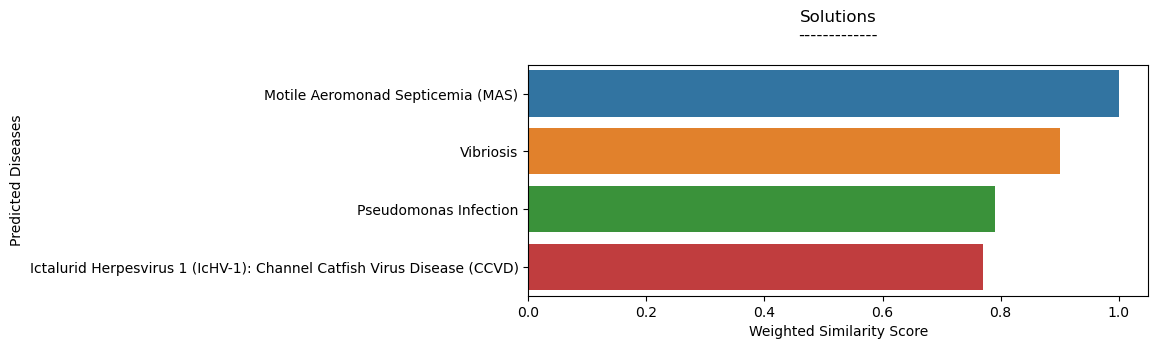

In [17]:
fig = cbr_obj.visualize_results(final_results)

## Testing and Inferencing on the Test Set

In [18]:
test_set = pd.read_csv("Dataset\Test_cbr_case_binary.csv", index_col=0)
test_set.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S26,S27,S28,S29,S30,S31,S32,S33,Diagnosis/Disease,CaseAlias
QueryID,,,,,,,,,,,,,,,,,,,,,
Query_001,1,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,D1,Motile Aeromonad Septicemia (MAS)
Query_002,1,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,D3,Enteric Septicemia of Catfish (ESC)
Query_003,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,D4,Dropsy
Query_004,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,D5,Vibriosis
Query_005,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,D9,Columnaris Disease


In [19]:
test_set_problems = test_set[test_set.columns[:-2]]
test_set_actual_solutions = test_set[test_set.columns[-2:]]

In [20]:
test_set_problems.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S24,S25,S26,S27,S28,S29,S30,S31,S32,S33
QueryID,,,,,,,,,,,,,,,,,,,,,
Query_001,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Query_002,1,1,1,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Query_003,1,1,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
Query_004,1,0,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
Query_005,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test_set_actual_solutions.head()

,Diagnosis/Disease,CaseAlias
QueryID,,
Query_001,D1,Motile Aeromonad Septicemia (MAS)
Query_002,D3,Enteric Septicemia of Catfish (ESC)
Query_003,D4,Dropsy
Query_004,D5,Vibriosis
Query_005,D9,Columnaris Disease


In [22]:
cbr_obj.get_best_solution(problem=list(test_set_problems.iloc[0].values))

{'disease': 'D5', 'alias': 'Vibriosis', 'similarity_score': 0.9}

In [23]:
predicted_solutions = cbr_obj.get_best_solutions_for_test_cases(test_set_problems)
predicted_solutions.head()

,disease,alias,similarity_score
0,D5,Vibriosis,0.90
1,D1,Motile Aeromonad Septicemia (MAS),0.83
2,D4,Dropsy,0.76
3,D1,Motile Aeromonad Septicemia (MAS),0.90
4,D9,Columnaris Disease,0.89


In [24]:
y_true = test_set_actual_solutions[test_set_actual_solutions.columns[0]]
y_true

QueryID
Query_001     D1
Query_002     D3
Query_003     D4
Query_004     D5
Query_005     D9
Query_006    D10
Query_007    D11
Query_008    D15
Query_009    D23
Query_010    D25
Query_011    D27
Query_012    D30
Query_013    D32
Name: Diagnosis/Disease, dtype: object

In [25]:
y_pred = predicted_solutions[predicted_solutions.columns[0]]
y_pred

0      D5
1      D1
2      D4
3      D1
4      D9
5     D10
6     D10
7     D15
8     D23
9     D25
10    D27
11    D30
12    D32
Name: disease, dtype: object

In [26]:
metrics = cbr_obj.evaluate_cbr_metrics(true_values=y_true, predicted_values=y_pred)
metrics

c:\Users\DONSITECH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,metrics
accuracy,0.692308
precision,0.653846
recall,0.692308
f1_score,0.666667
roc_auc,0.833333


Text(0.5, 1.0, 'Evaluation Metrics on Test set')

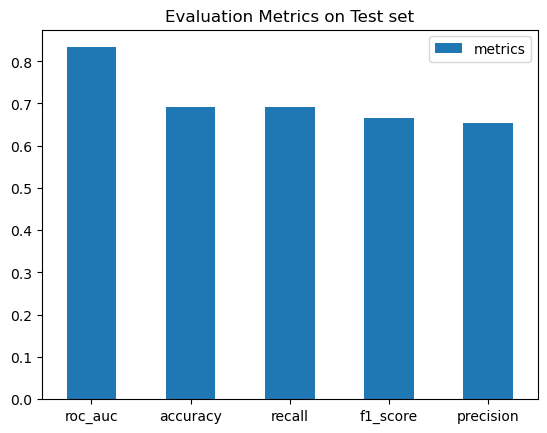

In [27]:
metrics.sort_values(by="metrics", ascending=False).plot.bar(rot=0)
plt.title("Evaluation Metrics on Test set")

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

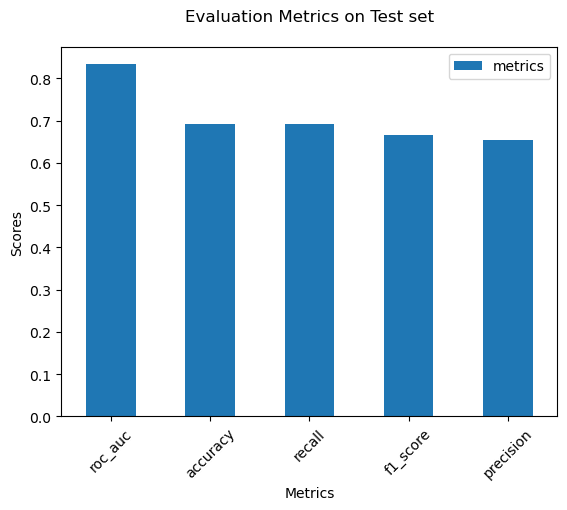

In [28]:
cbr_obj.visualize_metrics(metrics=metrics)